# Análise da probabilidade de ataques cardíacos
---

## Análise inicial

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


In [25]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [26]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [27]:
df["hypertension"].mean()

0.0974559686888454

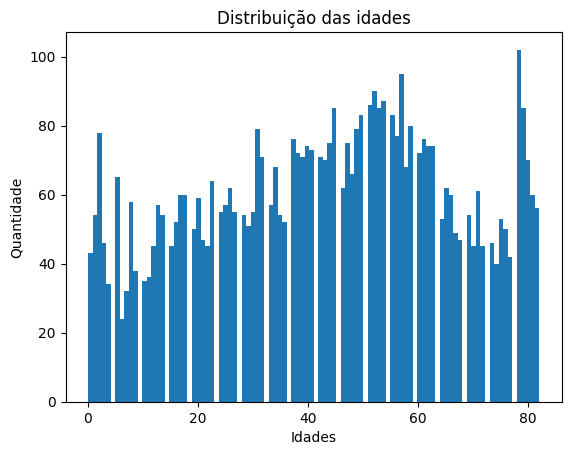

In [28]:
plt.figure()
plt.hist(df["age"], 100)
plt.title("Distribuição das idades")
plt.xlabel("Idades")
plt.ylabel("Quantidade")
plt.show()

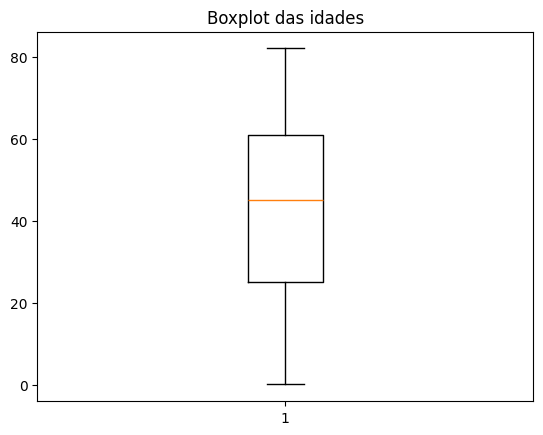

In [29]:
plt.figure()
plt.boxplot(df["age"], meanline=True)
plt.title("Boxplot das idades")


plt.show()

In [30]:
df[df['stroke'] == 1]['hypertension'].value_counts(normalize=True)

hypertension
0    0.73494
1    0.26506
Name: proportion, dtype: float64

### Concluímos a partir disso que 26% das pessoas que sofreram avc sofriam de hipertensão

In [31]:
df[df['stroke'] == 1]['age'].value_counts()

age
78.00    21
80.00    17
79.00    17
81.00    14
57.00    11
76.00    10
68.00     9
74.00     9
63.00     9
82.00     9
77.00     8
59.00     8
71.00     7
58.00     7
72.00     6
61.00     6
70.00     6
75.00     6
54.00     6
69.00     6
66.00     4
60.00     4
51.00     4
73.00     4
65.00     3
64.00     3
50.00     3
39.00     3
49.00     3
56.00     3
45.00     3
67.00     3
55.00     2
38.00     2
53.00     2
48.00     2
52.00     2
47.00     1
43.00     1
42.00     1
1.32      1
46.00     1
32.00     1
14.00     1
Name: count, dtype: int64

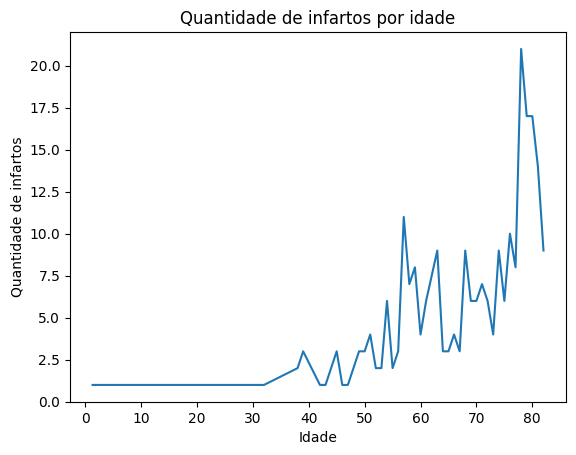

In [32]:
plt.figure()

df_idade_count = df[df['stroke'] == 1]['age'].value_counts().sort_index()


plt.plot(df_idade_count)
plt.title("Quantidade de infartos por idade")
plt.ylabel("Quantidade de infartos")
plt.xlabel("Idade")
plt.show()

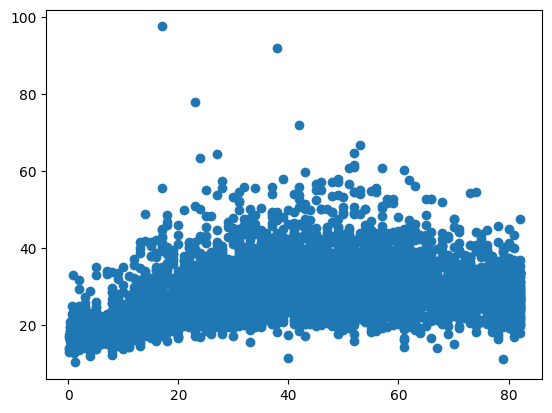

In [33]:




# correlation_matrix = df.corr()


plt.scatter(df["age"], df["bmi"])




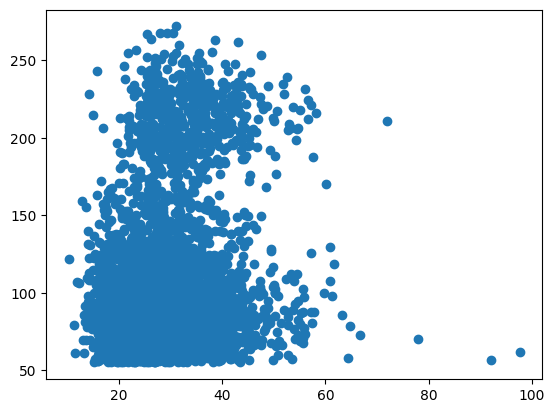

In [34]:
plt.scatter(df["bmi"], df["avg_glucose_level"])

In [35]:
from scipy.stats import pointbiserialr

# Suponha que 'avc' seja a variável booleana e 'idade' seja a variável numérica
correlation, p_value = pointbiserialr(df["stroke"], df["age"])

print("Correlação de Point-Biserial:", correlation)
print("Valor P:", p_value)



Correlação de Point-Biserial: 0.24525734617096592
Valor P: 7.0307775130741184e-71


In [36]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Criando um dataset filtrado

In [37]:
df_stroke = df[df["stroke"] == 1]

In [38]:
df[df["stroke"] == 1]["ever_married"].value_counts(normalize=True)

ever_married
Yes    0.883534
No     0.116466
Name: proportion, dtype: float64

### Como a proporção de pessoas morando no campo e na cidade é praticamente igual, conclui-se que a chance de você ter um avc morando na cidade é cerca de 10% 

In [39]:
df["Residence_type"].value_counts(normalize=True)

Residence_type
Urban    0.508023
Rural    0.491977
Name: proportion, dtype: float64

In [40]:
df_stroke["Residence_type"].value_counts(normalize=True)

Residence_type
Urban    0.542169
Rural    0.457831
Name: proportion, dtype: float64

In [41]:
df["heart_disease"].value_counts(normalize=True)

heart_disease
0    0.945988
1    0.054012
Name: proportion, dtype: float64

In [42]:
df_stroke["heart_disease"].value_counts(normalize=True)

heart_disease
0    0.811245
1    0.188755
Name: proportion, dtype: float64

In [43]:
df["gender"].value_counts(normalize=True)

gender
Female    0.585910
Male      0.413894
Other     0.000196
Name: proportion, dtype: float64

### Apenas 5% das pessoas da base de dados possuem doenças do coração e essas mesmas pessoas representam 20% dos avc resgistrados

In [44]:
dados_prop = df.copy()

# Colunas para calcular proporções
colunas_para_calcular_proporcoes = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age']

for coluna in colunas_para_calcular_proporcoes:
    proporcoes = df[df['stroke'] == 1][coluna].value_counts(normalize=True)
    mapeamento = proporcoes.to_dict()
    dados_prop[coluna] = df[coluna].map(mapeamento)
    
dados_prop

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.433735,0.012048,0.73494,0.188755,0.883534,0.598394,0.542169,228.69,36.6,0.281124,1
1,51676,0.566265,0.024096,0.73494,0.811245,0.883534,0.261044,0.457831,202.21,NaN,0.361446,1
2,31112,0.433735,0.068273,0.73494,0.188755,0.883534,0.598394,0.457831,105.92,32.5,0.361446,1
3,60182,0.566265,0.012048,0.73494,0.811245,0.883534,0.598394,0.542169,171.23,34.4,0.168675,1
4,1665,0.566265,0.068273,0.26506,0.811245,0.883534,0.261044,0.457831,174.12,24.0,0.361446,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0.566265,0.068273,0.26506,0.811245,0.883534,0.598394,0.542169,83.75,NaN,0.361446,0
5106,44873,0.566265,0.056225,0.73494,0.811245,0.883534,0.261044,0.542169,125.20,40.0,0.361446,0
5107,19723,0.566265,NaN,0.73494,0.811245,0.883534,0.261044,0.457831,82.99,30.6,0.361446,0
5108,37544,0.433735,0.016064,0.73494,0.811245,0.883534,0.598394,0.457831,166.29,25.6,0.281124,0


In [45]:
df["smoking_status"].value_counts(normalize=True)

smoking_status
never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: proportion, dtype: float64

In [47]:
df["stroke"].value_counts(normalize=True)

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [48]:
pd.get_dummies(df["work_type"])

,Govt_job,Never_worked,Private,Self-employed,children
0,False,False,True,False,False
1,False,False,False,True,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,False,True,False
...,...,...,...,...,...
5105,False,False,True,False,False
5106,False,False,False,True,False
5107,False,False,False,True,False
5108,False,False,True,False,False


In [52]:
df2 = pd.get_dummies(df, columns=['work_type'])

<Axes: >

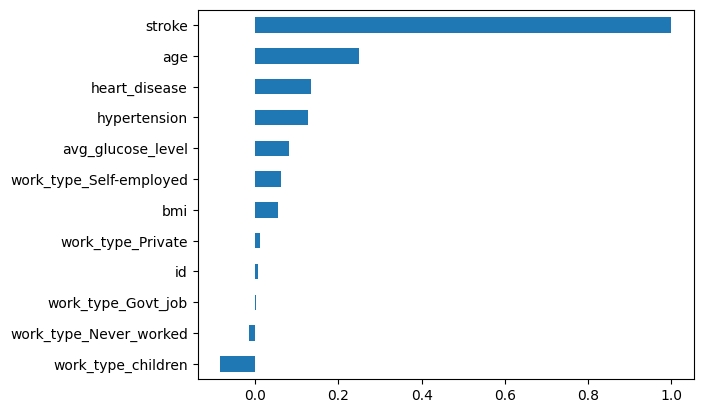

In [55]:
df2.corr(method="spearman",numeric_only=True)["stroke"].sort_values().plot(kind = "barh")

In [59]:
import seaborn as sns

In [61]:
import scipy
for column in df2.drop(columns=["id", "stroke"]).columns:
    x = df2[df2["stroke"] == 0][column]
    y = df2[df2["stroke"] == 1][column]

    _, p[column] = scipy.stats.mannwhitneyu(x, y)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''